In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

sumber https://www.kaggle.com/heeraldedhia/kmeans-clustering-for-customer-data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/segmented_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [4]:
df.drop(["CustomerID","cluster","Gender"], axis=1, inplace=True)

In [5]:
X=np.array(df)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

Visualisasi X ke dalam 2D

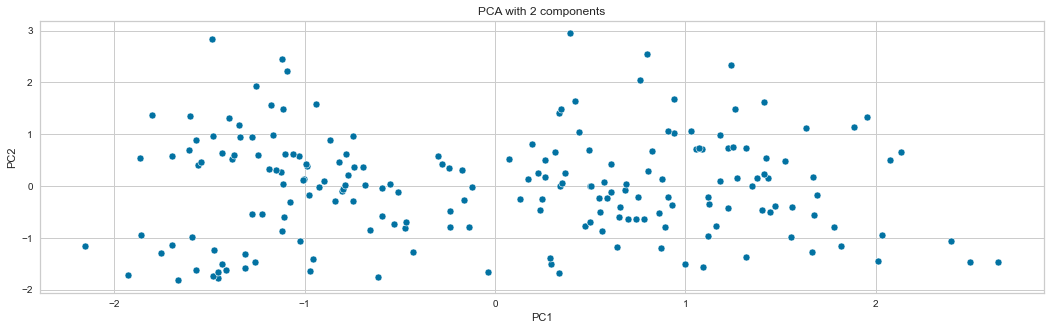

In [7]:
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(X_scaled)
                for k in range(1, 9)]

Elbow Method


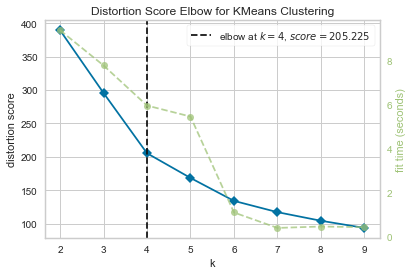

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(X_scaled)
Elbow_M.show()

In [10]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [11]:
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

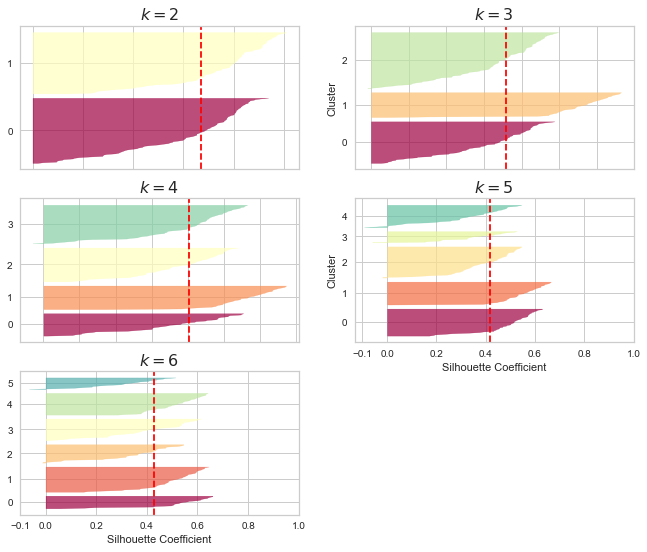

In [12]:

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

**KMeans**

In [14]:
kmeans = KMeans(n_clusters=4, random_state=26)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=26)

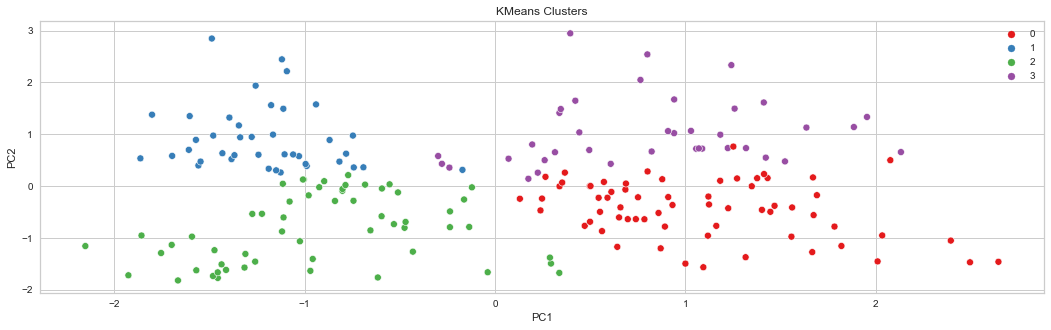

In [15]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [ ]:
X_cluster1 = df.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,1


EDA untuk Kmeans

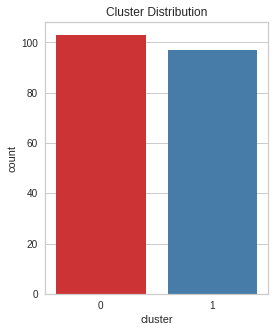

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

**Agglomerative**

In [ ]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X_scaled)

AgglomerativeClustering()

In [ ]:
X_cluster2 = df.copy()
X_cluster2['cluster'] = agglo.labels_
X_cluster2.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1


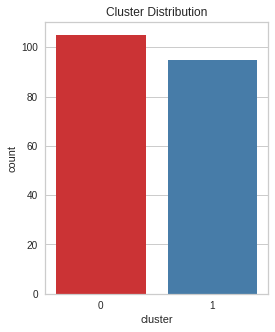

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster2, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

**Spectral**

In [ ]:
spectral = SpectralClustering(n_clusters=2, random_state=26)
spectral.fit(X_scaled)

SpectralClustering(n_clusters=2, random_state=26)

In [ ]:
X_cluster3 = df.copy()
X_cluster3['cluster'] = spectral.labels_
X_cluster3.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0


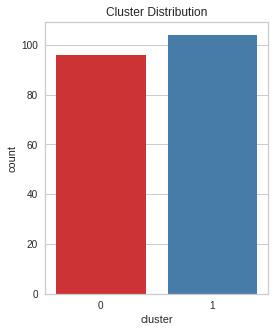

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

DBSCAN

In [ ]:
DBsc = DBSCAN(eps=1.5, min_samples=4)
DBsc.fit(X_scaled)

DBSCAN(eps=1.5, min_samples=4)

In [ ]:
X_cluster4 = df.copy()
X_cluster4['cluster'] = DBsc.labels_
X_cluster4.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


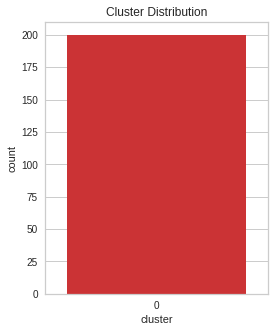

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster4, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()